Group #3 ICG Group Project

In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# data=pd.read_csv('company3.csv')
file_path = '/content/drive/My Drive/Colab Notebooks/Time_Series/company3.csv'
data = pd.read_csv(file_path)

NameError: name 'pd' is not defined

In [ ]:
data.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday
0,2010-02-05,1,1,32452.79,False
1,2010-02-12,1,1,50360.71,True
2,2010-02-19,1,1,28504.70,False
3,2010-02-26,1,1,23033.73,False
4,2010-03-05,1,1,29662.30,False


In [ ]:
data.describe()

,Store,Dept,Weekly_Sales
count,14603.000000,14603.000000,14603.000000
mean,5.766144,29.193043,14067.041557
std,1.955651,30.650536,16407.657180
min,1.000000,1.000000,-4988.940000
25%,5.000000,4.000000,3039.790000
50%,7.000000,17.000000,8205.250000
75%,7.000000,48.000000,20993.275000
max,7.000000,99.000000,266480.630000


In [ ]:
data.isnull().sum()

,0
Date,0
Store,0
Dept,0
Weekly_Sales,0
IsHoliday,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14603 entries, 0 to 14602
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          14603 non-null  object 
 1   Store         14603 non-null  int64  
 2   Dept          14603 non-null  int64  
 3   Weekly_Sales  14603 non-null  float64
 4   IsHoliday     14603 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 470.7+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.set_index('Date',inplace=True)


In [ ]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,32452.79,False
2010-02-12,1,1,50360.71,True
2010-02-19,1,1,28504.70,False
2010-02-26,1,1,23033.73,False
2010-03-05,1,1,29662.30,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14603 entries, 2010-02-05 to 2012-08-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         14603 non-null  int64  
 1   Dept          14603 non-null  int64  
 2   Weekly_Sales  14603 non-null  float64
 3   IsHoliday     14603 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 470.6 KB


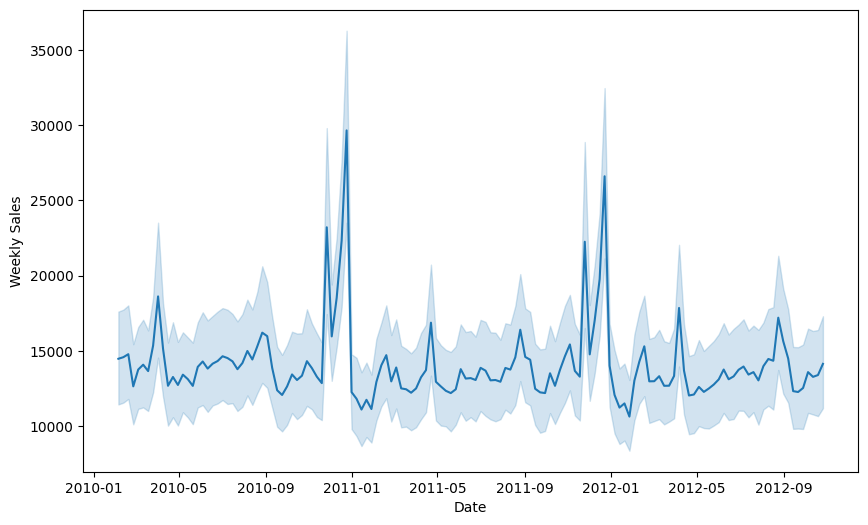

In [ ]:
plt.figure(figsize=(10,6))
sb.lineplot(data=data,x='Date',y='Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

Time series analysis for store=1 and depatment=1

In [ ]:
store1_1=data[(data['Store']==2) &(data['Dept']==4)]
store1_1


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,2,4,28346.73,False
2010-02-12,2,4,27765.68,True
2010-02-19,2,4,27103.50,False
2010-02-26,2,4,24185.32,False
2010-03-05,2,4,30472.86,False
...,...,...,...,...
2012-09-28,2,4,29296.18,False
2012-10-05,2,4,32051.59,False
2012-10-12,2,4,31105.20,False


In [ ]:
store11=store1_1.drop(['Store','Dept'],axis=1)
store11

,Weekly_Sales,IsHoliday
Date,,
2010-02-05,28346.73,False
2010-02-12,27765.68,True
2010-02-19,27103.50,False
2010-02-26,24185.32,False
2010-03-05,30472.86,False
...,...,...
2012-09-28,29296.18,False
2012-10-05,32051.59,False
2012-10-12,31105.20,False


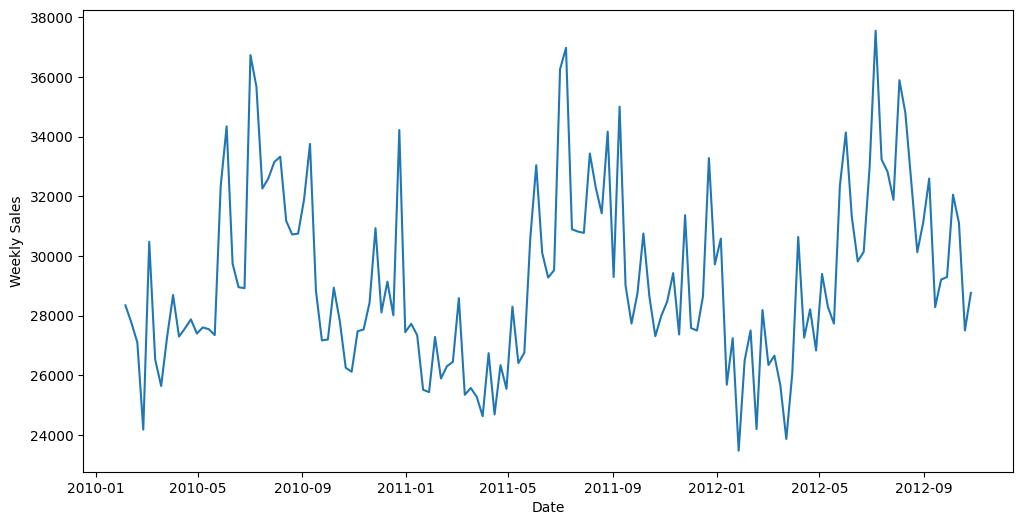

In [ ]:

plt.figure(figsize=(12, 6))
sb.lineplot(data=store11, x='Date', y='Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

plt.show()

In [ ]:
store11.info()

NameError: name 'store11' is not defined

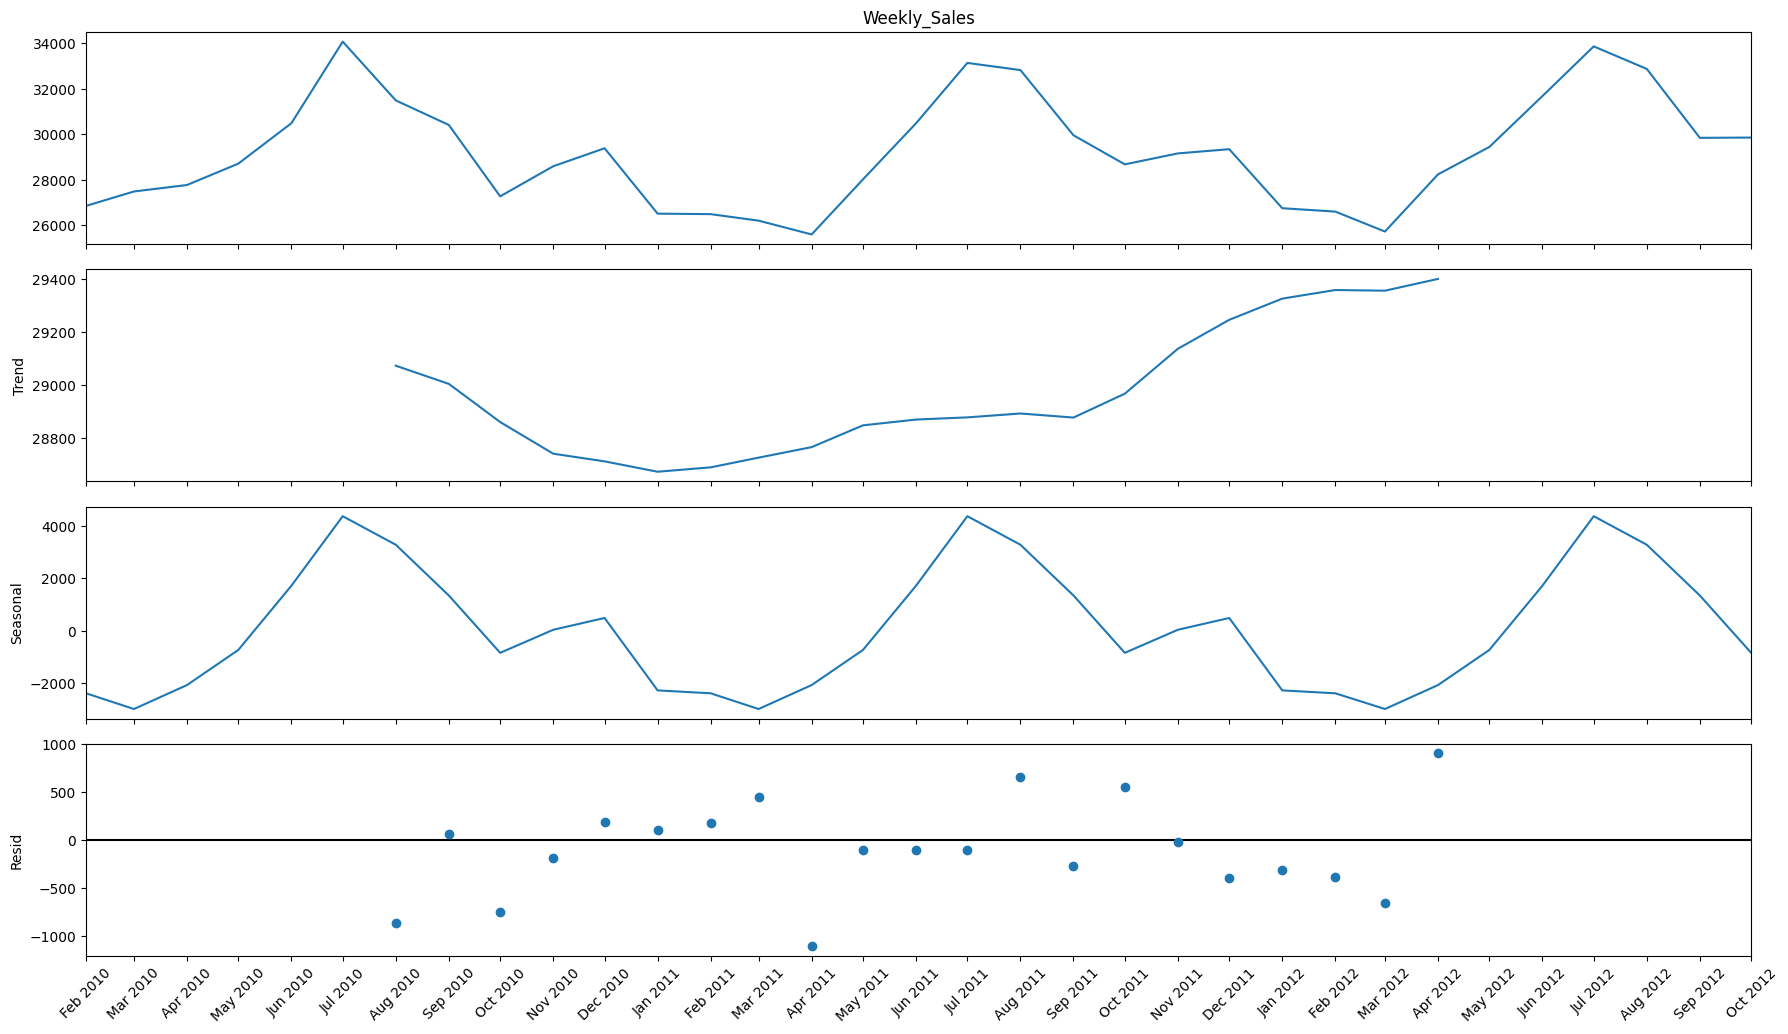

In [ ]:
from matplotlib.dates import MonthLocator, DateFormatter
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
store11_Monthly_Sales = store11['Weekly_Sales'].resample('MS').mean()
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(store11_Monthly_Sales, model='additive')
fig = decomposition.plot()
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()


In [ ]:
adft = adfuller(store11_Monthly_Sales,autolag="AIC")
output_store11 = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used","No. of observation used",
"critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_store11)

      Values                   Metric
0  -0.574896          Test Statistics
1   0.876554                  p-value
2  10.000000         No. of lags used
3  22.000000  No. of observation used
4  -3.769733      critical value (1%)
5  -3.005426      critical value (5%)
6  -2.642501     critical value (10%)


<Figure size 11000x500 with 0 Axes>

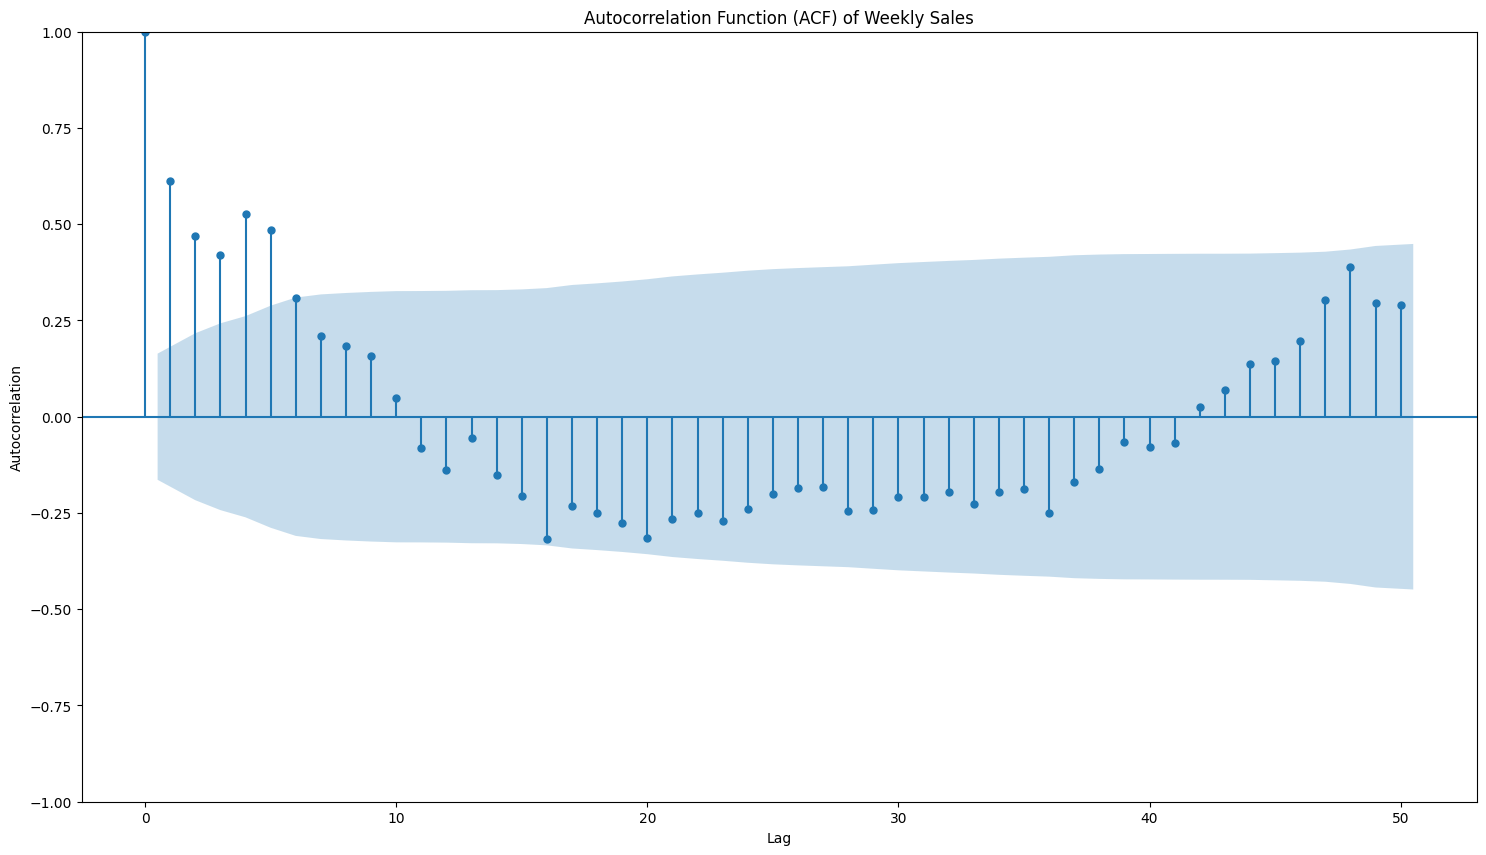

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(110, 5))
plot_acf(store11['Weekly_Sales'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Weekly Sales')
plt.show()

In [ ]:
!pip install pmdarima

P=0

In [ ]:
import pmdarima as pm
smodel = pm.auto_arima(store11['Weekly_Sales'], start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2470.423, Time=3.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2534.525, Time=0.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2494.931, Time=0.59 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2459.702, Time=2.33 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2518.286, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.80 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=2.36 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2483.735, Time=1.74 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=9.97 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2459.061, Time=0.86 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2517.612, Time=0.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2460.453, Time=1.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2460.476, Time=2.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2484.731, Time=0.25 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=4.84 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2464.127, Time=1.90 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,1)[12]             : AIC=2460.270, Time=1.16 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,1,1)[12]             : AIC=2460.776, Time=1.45 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,1,1)[12]             : AIC=2474.199, Time=0.26 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,1,1)[12]             : AIC=2477.549, Time=0.25 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,1,1)[12]             : AIC=2460.616, Time=1.38 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,1)[12] intercept   : AIC=2458.421, Time=1.17 sec
 ARIMA(1,1,1)(0,1,0)[12] intercept   : AIC=2519.060, Time=0.13 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,1)[12] intercept   : AIC=2461.886, Time=1.42 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,2)[12] intercept   : AIC=2468.591, Time=2.66 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,0)[12] intercept   : AIC=2485.897, Time=0.32 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,2)[12] intercept   : AIC=inf, Time=6.58 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=2459.559, Time=0.96 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,1)[12] intercept   : AIC=2464.872, Time=0.97 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,1)[12] intercept   : AIC=2465.779, Time=1.48 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,1,1)[12] intercept   : AIC=2461.197, Time=1.39 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=2471.656, Time=0.68 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,1,1)[12] intercept   : AIC=2458.458, Time=1.14 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,1,1)[12] intercept   : AIC=2478.774, Time=0.29 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,1,1)[12] intercept   : AIC=2471.518, Time=1.58 sec

Best model:  ARIMA(1,1,1)(0,1,1)[12] intercept
Total fit time: 57.754 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1224.211
Date:                            Wed, 03 Sep 2025   AIC                           2458.421
Time:                                    09:31:20   BIC                           2472.759
Sample:                                02-05-2010   HQIC                          2464.247
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -47.5003     35.210     -1.349      0.177    -116.510      21.510
ar.L1          0.2854      0.198      1.440      0.150      -0.103       0.674
ma.L1         -0.6145      0.179     -3.428      0.001      -0.966      -0.263
ma.S.L12      -0.8419      0.095     -8.856      0.000      -1.028      -0.656
sigma2      8.016e+06   1.09e+06      7.385      0.000    5.89e+06    1.01e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.66   Prob(JB):                         0.58
Heteroskedasticity (H):               0.67   Skew:                             0.22
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
Future_predictions=smodel.predict(n_periods=26)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
store11pred=pd.DataFrame( Future_predictions,columns=['Weekly_Sales'])
store11pred


,Weekly_Sales
2012-11-02,28375.089623
2012-11-09,28508.587774
2012-11-16,28625.752778
2012-11-23,28287.245157
2012-11-30,27093.622637
2012-12-07,26739.738701
2012-12-14,26942.645637
2012-12-21,27103.536143
2012-12-28,26313.780895
2013-01-04,26158.890085


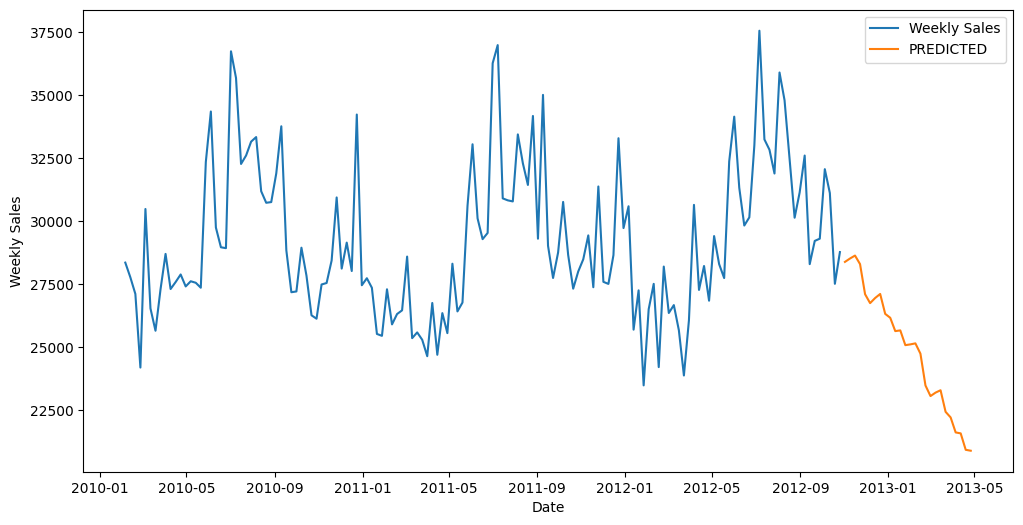

In [ ]:
plt.figure(figsize=(12,6))
sb.lineplot(data=store11 , x=store11.index,y="Weekly_Sales",label='Weekly Sales' )
sb.lineplot(data=store11pred,x=store11pred.index,y='Weekly_Sales',label='PREDICTED')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
train_size = int(len(store11) * 0.8)  # 80% training data, 20% testing data
train, test = store11[:train_size], store11[train_size:]


In [ ]:
smodel = pm.auto_arima(train['Weekly_Sales'], start_p=0, start_q=0,
                       test='adf', max_p=3, max_q=2, m=12,
                       start_P=0, seasonal=True, d=None, D=1,
                       trace=True, error_action='ignore',
                       suppress_warnings=True, stepwise=True)

smodel.summary()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1926.235, Time=0.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1970.431, Time=0.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1938.209, Time=0.41 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1919.700, Time=0.58 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1961.070, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1921.474, Time=1.09 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1921.488, Time=1.17 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1937.447, Time=0.15 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1925.294, Time=0.78 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1919.962, Time=1.50 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1922.141, Time=1.89 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1923.567, Time=1.34 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=1920.194, Time=0.70 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fit time: 12.099 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -956.850
Date:                            Wed, 03 Sep 2025   AIC                           1919.700
Time:                                    09:32:04   BIC                           1927.546
Sample:                                02-05-2010   HQIC                          1922.876
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3179      0.085     -3.724      0.000      -0.485      -0.151
ma.S.L12      -0.7265      0.084     -8.641      0.000      -0.891      -0.562
sigma2      9.243e+06   1.43e+06      6.445      0.000    6.43e+06    1.21e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.71   Prob(JB):                         0.65
Heteroskedasticity (H):               0.75   Skew:                             0.22
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
n_periods = len(test)
test_predictions = smodel.predict(n_periods=n_periods)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [ ]:
r2 = r2_score(test['Weekly_Sales'],   test_predictions)
mape = mean_absolute_percentage_error(test['Weekly_Sales'], test_predictions)
print(f'R² Score: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')

NameError: name 'r2_score' is not defined

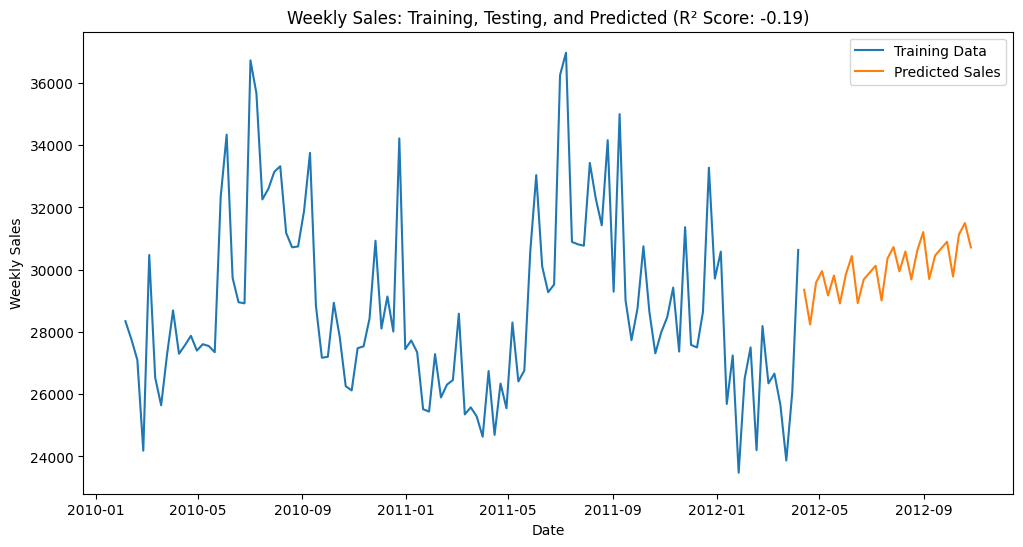

In [ ]:
plt.figure(figsize=(12, 6))
sb.lineplot(data=train, x=train.index, y="Weekly_Sales", label='Training Data')
# sb.lineplot(data=test, x=test.index, y="Weekly_Sales", label='Testing Data')
sb.lineplot(data=test_predictions,label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title(f'Weekly Sales: Training, Testing, and Predicted (R² Score: {r2:.2f})')
plt.legend()
plt.show()

In [ ]:
Future_26_weeks_predictions = smodel.predict(n_periods=26)

future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(weeks=1), periods=26, freq='W')

future_predictions_df = pd.DataFrame(Future_26_weeks_predictions, index=future_dates, columns=['Future_Predicted_Weekly_Sales'])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


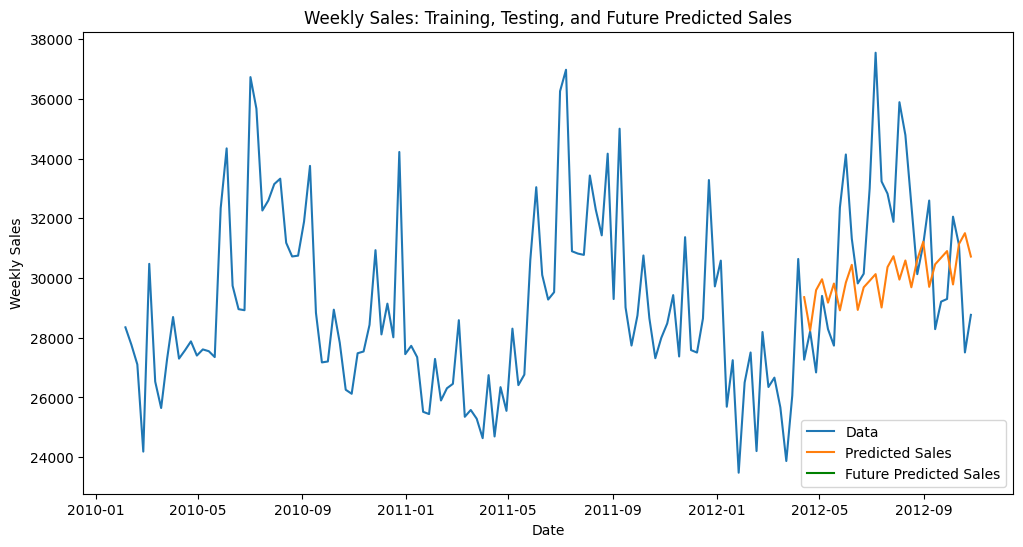

In [ ]:

plt.figure(figsize=(12, 6))
sb.lineplot(data=store11, x=store11.index, y="Weekly_Sales", label='Data')
# sb.lineplot(data=test, x=test.index, y="Weekly_Sales", label='Testing Data')
sb.lineplot(data=test_predictions, label='Predicted Sales')
sb.lineplot(data=future_predictions_df, x=future_predictions_df.index, y='Future_Predicted_Weekly_Sales', label='Future Predicted Sales', color='green')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales: Training, Testing, and Future Predicted Sales')
plt.legend()
plt.show()

# Model Improvement Techniques

The following sections contain various techniques to improve the R² score and overall model performance.

In [ ]:
# Install required packages for improvements
import warnings
warnings.filterwarnings('ignore')

# Install additional packages if needed
try:
    import pmdarima as pm
    from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    print("All required packages are available!")
except ImportError as e:
    print(f"Missing package: {e}")
    print("Please install missing packages using: pip install pmdarima scikit-learn statsmodels")

In [ ]:
# Recreate the data and train/test split for improvement techniques
# Load and prepare data (using local file path instead of Google Colab)
try:
    data = pd.read_csv('company3.csv')
except FileNotFoundError:
    print("Please ensure company3.csv is in the same directory as this notebook")
    print("Or update the path below:")
    # Alternative paths you can try:
    file_paths = [
        'company3.csv',
        './company3.csv', 
        '../company3.csv',
        'Final Assignment/company3.csv'
    ]
    data = None
    for path in file_paths:
        try:
            data = pd.read_csv(path)
            print(f"Data loaded successfully from: {path}")
            break
        except FileNotFoundError:
            continue
    
if data is not None:
    # Prepare the data
    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
    data.set_index('Date', inplace=True)
    
    # Filter for Store=2 and Dept=4 (as in original analysis)
    store11_data = data[(data['Store']==2) & (data['Dept']==4)]
    store11_clean = store11_data.drop(['Store','Dept'], axis=1)
    
    # Create train/test split
    train_size = int(len(store11_clean) * 0.8)
    train_data = store11_clean[:train_size]
    test_data = store11_clean[train_size:]
    
    print(f"Data shape: {data.shape}")
    print(f"Store 2, Dept 4 data shape: {store11_clean.shape}")
    print(f"Train data shape: {train_data.shape}")
    print(f"Test data shape: {test_data.shape}")
else:
    print("Could not load data. Please check the file path.")

## Technique 1: Log Transformation for Variance Stabilization

Log transformation can help stabilize variance and improve model performance for time series with exponential growth patterns.

In [ ]:
# Technique 1: Log Transformation
if data is not None:
    # Apply log transformation (add 1 to avoid log(0))
    store11_log = store11_clean.copy()
    store11_log['Weekly_Sales'] = np.log1p(store11_clean['Weekly_Sales'])
    
    # Split log-transformed data
    train_log = store11_log[:train_size]
    test_log = store11_log[train_size:]
    
    # Fit ARIMA model on log-transformed data
    log_model = pm.auto_arima(train_log['Weekly_Sales'], 
                              start_p=0, start_q=0,
                              test='adf', max_p=3, max_q=2, m=12,
                              start_P=0, seasonal=True, d=None, D=1,
                              trace=False, error_action='ignore',
                              suppress_warnings=True, stepwise=True)
    
    # Make predictions
    log_predictions = log_model.predict(n_periods=len(test_log))
    
    # Transform predictions back to original scale
    log_predictions_original = np.expm1(log_predictions)
    
    # Calculate metrics
    log_r2 = r2_score(test_data['Weekly_Sales'], log_predictions_original)
    log_mape = mean_absolute_percentage_error(test_data['Weekly_Sales'], log_predictions_original)
    
    print("=== Log Transformation Results ===")
    print(f'Log Model R² Score: {log_r2:.4f}')
    print(f'Log Model MAPE: {log_mape:.4f}')
    print(f'Log Model ARIMA order: {log_model.order}')
    print(f'Log Model Seasonal order: {log_model.seasonal_order}')
else:
    print("Data not available for log transformation.")

## Technique 2: Data Scaling and Normalization

Scaling data can help models converge better and improve prediction accuracy.

In [ ]:
# Technique 2: Data Scaling with MinMaxScaler
if data is not None:
    # Scale the data using MinMaxScaler
    scaler = MinMaxScaler()
    
    # Fit scaler on training data
    train_scaled = train_data.copy()
    train_scaled['Weekly_Sales'] = scaler.fit_transform(train_data[['Weekly_Sales']])
    
    # Transform test data
    test_scaled = test_data.copy()
    test_scaled['Weekly_Sales'] = scaler.transform(test_data[['Weekly_Sales']])
    
    # Fit ARIMA model on scaled data
    scaled_model = pm.auto_arima(train_scaled['Weekly_Sales'], 
                                 start_p=0, start_q=0,
                                 test='adf', max_p=3, max_q=2, m=12,
                                 start_P=0, seasonal=True, d=None, D=1,
                                 trace=False, error_action='ignore',
                                 suppress_warnings=True, stepwise=True)
    
    # Make predictions
    scaled_predictions = scaled_model.predict(n_periods=len(test_scaled))
    
    # Transform predictions back to original scale
    scaled_predictions_original = scaler.inverse_transform(scaled_predictions.reshape(-1, 1)).flatten()
    
    # Calculate metrics
    scaled_r2 = r2_score(test_data['Weekly_Sales'], scaled_predictions_original)
    scaled_mape = mean_absolute_percentage_error(test_data['Weekly_Sales'], scaled_predictions_original)
    
    print("=== Data Scaling Results ===")
    print(f'Scaled Model R² Score: {scaled_r2:.4f}')
    print(f'Scaled Model MAPE: {scaled_mape:.4f}')
    print(f'Scaled Model ARIMA order: {scaled_model.order}')
    print(f'Scaled Model Seasonal order: {scaled_model.seasonal_order}')
else:
    print("Data not available for scaling.")

## Technique 3: Exponential Smoothing (Holt-Winters)

Exponential smoothing methods can often outperform ARIMA for seasonal data with trends.

In [ ]:
# Technique 3: Exponential Smoothing (Holt-Winters)
if data is not None:
    try:
        # Fit Holt-Winters model
        hw_model = ExponentialSmoothing(train_data['Weekly_Sales'], 
                                       trend='add', 
                                       seasonal='add', 
                                       seasonal_periods=52,  # Weekly seasonality
                                       freq='W').fit()
        
        # Make predictions
        hw_predictions = hw_model.forecast(steps=len(test_data))
        
        # Calculate metrics
        hw_r2 = r2_score(test_data['Weekly_Sales'], hw_predictions)
        hw_mape = mean_absolute_percentage_error(test_data['Weekly_Sales'], hw_predictions)
        
        print("=== Exponential Smoothing Results ===")
        print(f'Holt-Winters R² Score: {hw_r2:.4f}')
        print(f'Holt-Winters MAPE: {hw_mape:.4f}')
        
        # Visualize results
        plt.figure(figsize=(12, 6))
        plt.plot(train_data.index, train_data['Weekly_Sales'], label='Training Data', alpha=0.7)
        plt.plot(test_data.index, test_data['Weekly_Sales'], label='Test Data', alpha=0.7)
        plt.plot(test_data.index, hw_predictions, label='Holt-Winters Predictions', alpha=0.8)
        plt.xlabel('Date')
        plt.ylabel('Weekly Sales')
        plt.title(f'Holt-Winters Model (R² Score: {hw_r2:.4f})')
        plt.legend()
        plt.show()
        
    except Exception as e:
        print(f"Error with Holt-Winters model: {e}")
        print("Trying with different parameters...")
        try:
            # Try with multiplicative seasonality
            hw_model_mult = ExponentialSmoothing(train_data['Weekly_Sales'], 
                                               trend='add', 
                                               seasonal='mul', 
                                               seasonal_periods=52).fit()
            hw_predictions_mult = hw_model_mult.forecast(steps=len(test_data))
            hw_r2_mult = r2_score(test_data['Weekly_Sales'], hw_predictions_mult)
            hw_mape_mult = mean_absolute_percentage_error(test_data['Weekly_Sales'], hw_predictions_mult)
            
            print("=== Exponential Smoothing (Multiplicative) Results ===")
            print(f'Holt-Winters Multiplicative R² Score: {hw_r2_mult:.4f}')
            print(f'Holt-Winters Multiplicative MAPE: {hw_mape_mult:.4f}')
        except Exception as e2:
            print(f"Alternative Holt-Winters also failed: {e2}")
else:
    print("Data not available for Exponential Smoothing.")

## Technique 4: Feature Engineering with Time-based Features

Adding temporal features like month, quarter, year can capture seasonal patterns more effectively.

In [ ]:
# Technique 4: Feature Engineering with Time Features
if data is not None:
    # Create feature-enhanced dataset
    store11_features = store11_clean.copy()
    
    # Add time-based features
    store11_features['month'] = store11_features.index.month
    store11_features['quarter'] = store11_features.index.quarter
    store11_features['year'] = store11_features.index.year
    store11_features['week_of_year'] = store11_features.index.isocalendar().week
    store11_features['day_of_year'] = store11_features.index.dayofyear
    
    # Add cyclical features (to better capture seasonality)
    store11_features['month_sin'] = np.sin(2 * np.pi * store11_features['month'] / 12)
    store11_features['month_cos'] = np.cos(2 * np.pi * store11_features['month'] / 12)
    store11_features['week_sin'] = np.sin(2 * np.pi * store11_features['week_of_year'] / 52)
    store11_features['week_cos'] = np.cos(2 * np.pi * store11_features['week_of_year'] / 52)
    
    # Split the enhanced data
    train_features = store11_features[:train_size]
    test_features = store11_features[train_size:]
    
    # Try SARIMAX with external features
    try:
        feature_cols = ['month', 'quarter', 'week_of_year', 'month_sin', 'month_cos', 'week_sin', 'week_cos']
        
        sarimax_model = SARIMAX(train_features['Weekly_Sales'], 
                               exog=train_features[feature_cols],
                               order=(1, 1, 1), 
                               seasonal_order=(1, 1, 1, 12),
                               enforce_stationarity=False,
                               enforce_invertibility=False).fit(disp=False)
        
        # Make predictions
        sarimax_predictions = sarimax_model.forecast(steps=len(test_features), 
                                                    exog=test_features[feature_cols])
        
        # Calculate metrics
        sarimax_r2 = r2_score(test_features['Weekly_Sales'], sarimax_predictions)
        sarimax_mape = mean_absolute_percentage_error(test_features['Weekly_Sales'], sarimax_predictions)
        
        print("=== SARIMAX with Features Results ===")
        print(f'SARIMAX R² Score: {sarimax_r2:.4f}')
        print(f'SARIMAX MAPE: {sarimax_mape:.4f}')
        
        # Visualize results
        plt.figure(figsize=(12, 6))
        plt.plot(train_features.index, train_features['Weekly_Sales'], label='Training Data', alpha=0.7)
        plt.plot(test_features.index, test_features['Weekly_Sales'], label='Test Data', alpha=0.7)
        plt.plot(test_features.index, sarimax_predictions, label='SARIMAX Predictions', alpha=0.8)
        plt.xlabel('Date')
        plt.ylabel('Weekly Sales')
        plt.title(f'SARIMAX with Features (R² Score: {sarimax_r2:.4f})')
        plt.legend()
        plt.show()
        
    except Exception as e:
        print(f"Error with SARIMAX model: {e}")
        print("Feature engineering completed but SARIMAX failed. You can try simpler feature combinations.")
        
    print(f"Feature engineered dataset shape: {store11_features.shape}")
    print("Available features:", store11_features.columns.tolist())
else:
    print("Data not available for feature engineering.")

## Technique 5: LSTM Neural Network

LSTM networks can capture complex temporal patterns and non-linear relationships in time series data.

In [ ]:
# Technique 5: LSTM Neural Network
if data is not None:
    try:
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import LSTM, Dense, Dropout
        from tensorflow.keras.optimizers import Adam
        from sklearn.preprocessing import MinMaxScaler
        
        # Prepare data for LSTM
        def create_lstm_dataset(data, look_back=12):
            X, y = [], []
            for i in range(look_back, len(data)):
                X.append(data[i-look_back:i, 0])
                y.append(data[i, 0])
            return np.array(X), np.array(y)
        
        # Scale the data
        lstm_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_sales = lstm_scaler.fit_transform(store11_clean[['Weekly_Sales']])
        
        # Split data
        train_size_lstm = int(len(scaled_sales) * 0.8)
        train_lstm, test_lstm = scaled_sales[:train_size_lstm], scaled_sales[train_size_lstm:]
        
        # Create datasets
        look_back = 12  # Use 12 weeks to predict next week
        X_train, y_train = create_lstm_dataset(train_lstm, look_back)
        X_test, y_test = create_lstm_dataset(test_lstm, look_back)
        
        # Reshape for LSTM [samples, time steps, features]
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
        
        # Build LSTM model
        lstm_model = Sequential()
        lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
        lstm_model.add(Dropout(0.2))
        lstm_model.add(LSTM(50, return_sequences=False))
        lstm_model.add(Dropout(0.2))
        lstm_model.add(Dense(25))
        lstm_model.add(Dense(1))
        
        # Compile model
        lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
        
        # Train model
        print("Training LSTM model...")
        history = lstm_model.fit(X_train, y_train, batch_size=16, epochs=50, 
                                validation_split=0.2, verbose=0)
        
        # Make predictions
        lstm_predictions = lstm_model.predict(X_test, verbose=0)
        
        # Transform predictions back to original scale
        lstm_predictions_original = lstm_scaler.inverse_transform(lstm_predictions)
        y_test_original = lstm_scaler.inverse_transform(y_test.reshape(-1, 1))
        
        # Calculate metrics
        lstm_r2 = r2_score(y_test_original, lstm_predictions_original)
        lstm_mape = mean_absolute_percentage_error(y_test_original.flatten(), 
                                                  lstm_predictions_original.flatten())
        
        print("=== LSTM Neural Network Results ===")
        print(f'LSTM R² Score: {lstm_r2:.4f}')
        print(f'LSTM MAPE: {lstm_mape:.4f}')
        
        # Visualize results
        plt.figure(figsize=(12, 6))
        test_dates = store11_clean.index[train_size_lstm + look_back:]
        plt.plot(test_dates, y_test_original, label='Actual Sales', alpha=0.7)
        plt.plot(test_dates, lstm_predictions_original, label='LSTM Predictions', alpha=0.8)
        plt.xlabel('Date')
        plt.ylabel('Weekly Sales')
        plt.title(f'LSTM Model (R² Score: {lstm_r2:.4f})')
        plt.legend()
        plt.show()
        
        # Plot training history
        plt.figure(figsize=(10, 4))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('LSTM Model Training History')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
    except ImportError:
        print("TensorFlow/Keras not available. Please install: pip install tensorflow")
    except Exception as e:
        print(f"Error with LSTM model: {e}")
        print("You may need to install TensorFlow: pip install tensorflow")
else:
    print("Data not available for LSTM.")

## Model Performance Comparison

Compare all the different techniques to find the best performing model.

In [ ]:
# Model Performance Comparison and Summary
if data is not None:
    print("="*60)
    print("COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
    print("="*60)
    
    # Create a summary of all models (you'll need to run the above cells first)
    models_summary = []
    
    # Add each model's results if they were successfully computed
    try:
        if 'log_r2' in locals():
            models_summary.append(['Log Transformation', log_r2, log_mape])
    except: pass
    
    try:
        if 'scaled_r2' in locals():
            models_summary.append(['Data Scaling', scaled_r2, scaled_mape])
    except: pass
    
    try:
        if 'hw_r2' in locals():
            models_summary.append(['Holt-Winters', hw_r2, hw_mape])
    except: pass
    
    try:
        if 'sarimax_r2' in locals():
            models_summary.append(['SARIMAX with Features', sarimax_r2, sarimax_mape])
    except: pass
    
    try:
        if 'lstm_r2' in locals():
            models_summary.append(['LSTM Neural Network', lstm_r2, lstm_mape])
    except: pass
    
    if models_summary:
        # Create comparison dataframe
        comparison_df = pd.DataFrame(models_summary, 
                                   columns=['Model', 'R² Score', 'MAPE'])
        comparison_df = comparison_df.sort_values('R² Score', ascending=False)
        
        print("\nModel Performance Ranking (by R² Score):")
        print("-" * 50)
        for i, row in comparison_df.iterrows():
            print(f"{row['Model']:<25} | R²: {row['R² Score']:.4f} | MAPE: {row['MAPE']:.4f}")
        
        # Visualize comparison
        plt.figure(figsize=(12, 8))
        
        # R² Score comparison
        plt.subplot(2, 1, 1)
        bars1 = plt.bar(comparison_df['Model'], comparison_df['R² Score'], 
                       color=['green' if x > 0.7 else 'orange' if x > 0.5 else 'red' 
                             for x in comparison_df['R² Score']])
        plt.title('Model Comparison - R² Score')
        plt.ylabel('R² Score')
        plt.xticks(rotation=45, ha='right')
        plt.axhline(y=0.7, color='g', linestyle='--', alpha=0.7, label='Good (0.7)')
        plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Moderate (0.5)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # MAPE comparison
        plt.subplot(2, 1, 2)
        bars2 = plt.bar(comparison_df['Model'], comparison_df['MAPE'], 
                       color=['green' if x < 0.1 else 'orange' if x < 0.2 else 'red' 
                             for x in comparison_df['MAPE']])
        plt.title('Model Comparison - MAPE (Lower is Better)')
        plt.ylabel('MAPE')
        plt.xticks(rotation=45, ha='right')
        plt.axhline(y=0.1, color='g', linestyle='--', alpha=0.7, label='Excellent (<10%)')
        plt.axhline(y=0.2, color='orange', linestyle='--', alpha=0.7, label='Good (<20%)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Recommendations
        best_model = comparison_df.iloc[0]
        print(f"\n🏆 BEST PERFORMING MODEL: {best_model['Model']}")
        print(f"   R² Score: {best_model['R² Score']:.4f}")
        print(f"   MAPE: {best_model['MAPE']:.4f}")
        
        print("\n📈 RECOMMENDATIONS FOR IMPROVEMENT:")
        if best_model['R² Score'] < 0.5:
            print("   - Your data may need more preprocessing")
            print("   - Consider checking for outliers and anomalies")
            print("   - Try different seasonal periods (weekly, monthly, quarterly)")
            print("   - Consider external factors (holidays, promotions, economic indicators)")
        elif best_model['R² Score'] < 0.7:
            print("   - Try ensemble methods combining multiple models")
            print("   - Consider more sophisticated feature engineering")
            print("   - Experiment with different LSTM architectures")
        else:
            print("   - Great performance! Consider production deployment")
            print("   - Monitor model performance over time")
            print("   - Consider adding confidence intervals to predictions")
            
    else:
        print("No models were successfully computed. Please run the improvement techniques above first.")
        
else:
    print("Data not loaded. Please check the data loading section.")

## Installation Instructions

If you encounter any package import errors, run the following commands:

In [ ]:
# Install required packages (uncomment and run if needed)
# !pip install pmdarima
# !pip install statsmodels
# !pip install scikit-learn
# !pip install tensorflow
# !pip install matplotlib seaborn

# Verify installations
packages_to_check = [
    'pmdarima', 'statsmodels', 'sklearn', 'numpy', 'pandas', 
    'matplotlib', 'seaborn'
]

print("Checking package availability:")
for package in packages_to_check:
    try:
        __import__(package)
        print(f"✅ {package} - Available")
    except ImportError:
        print(f"❌ {package} - Missing (install with: pip install {package})")

print("\nFor TensorFlow (LSTM):")
try:
    import tensorflow
    print("✅ tensorflow - Available")
except ImportError:
    print("❌ tensorflow - Missing (install with: pip install tensorflow)")

Checking package availability:
❌ pmdarima - Missing (install with: pip install pmdarima)
❌ statsmodels - Missing (install with: pip install statsmodels)
❌ sklearn - Missing (install with: pip install sklearn)
❌ numpy - Missing (install with: pip install numpy)
❌ pandas - Missing (install with: pip install pandas)
❌ matplotlib - Missing (install with: pip install matplotlib)
❌ seaborn - Missing (install with: pip install seaborn)

For TensorFlow (LSTM):
❌ tensorflow - Missing (install with: pip install tensorflow)
